In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./Data/Annual_Parking_Study_Data.csv')
df['raw'].shape


/home/bok/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(95218, 24)

In [88]:
df['raw'].iloc[0]

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
5                            NaN
6                            NaN
7        Restricted Parking Zone
8        Restricted Parking Zone
9                            NaN
10                           NaN
11                           NaN
12                           NaN
13       Restricted Parking Zone
14       Restricted Parking Zone
15                           NaN
16                           NaN
17                           NaN
18                           NaN
19                           NaN
20                           NaN
21                           NaN
22                           NaN
23       Restricted Parking Zone
24       Restricted Parking Zone
25       Restricted Parking Zone
26       Restricted Parking Zone
27                           NaN
28                           NaN
29                           NaN
          

# Data cleaning

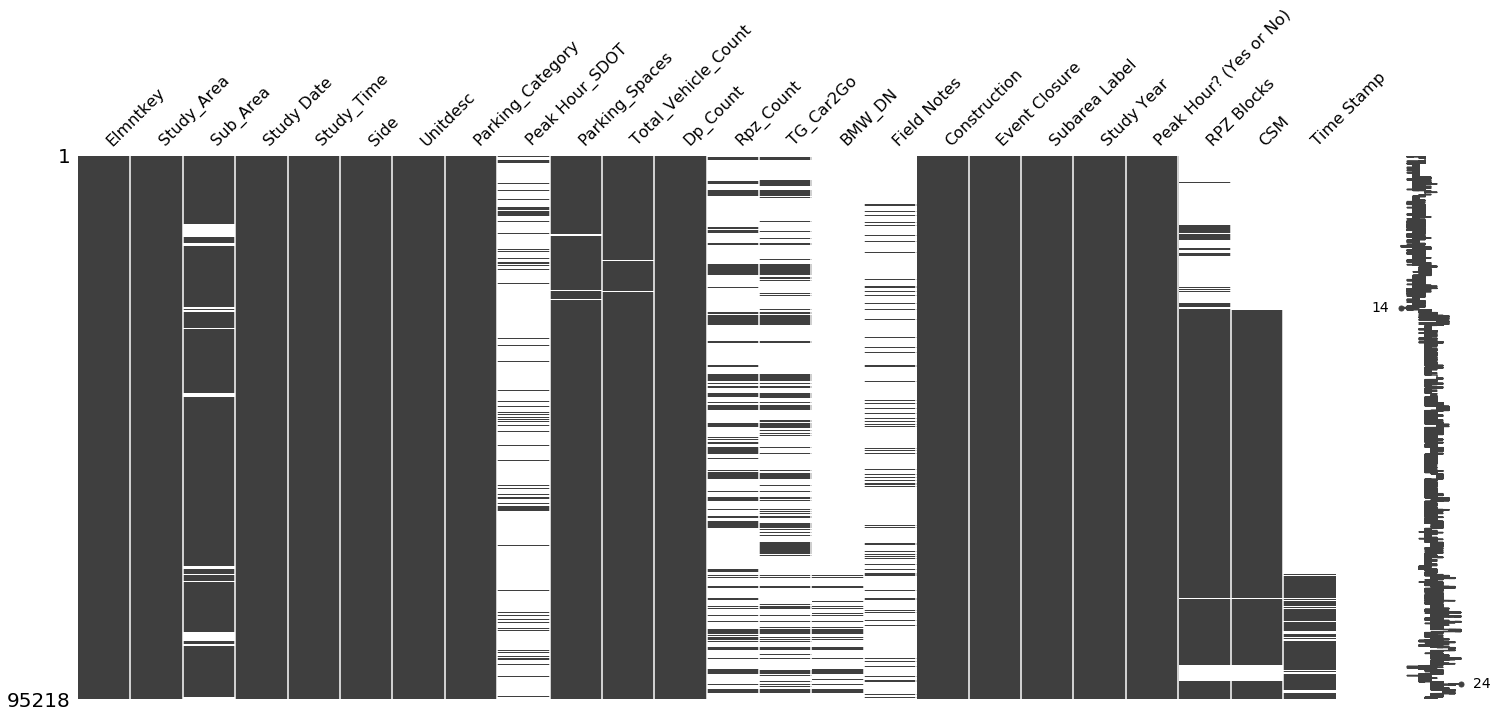

In [4]:
msno.matrix(df['raw'])

In [5]:
NA = df['raw'].shape[0] - df['raw'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		95108
Percent of lines containing N/A:	99.88%


There are some columns, which mostly contains missing values. Thees identify as Peak_Hour_SDOT, RPZ_Count, TG_Car2Go, BMW_DN, Field Notes and Time Stamp. Further more it is worth investegating the columns Sub_Area, RPZ_Blocks and CSM.

## Time stamp investegation
Time stamp has alot of missing values. It would be interesting to see, if timestamps has a relation with the study_Time, Study Date and Study Year columns.

In [6]:
NA = df['raw']['Time Stamp'].shape[0] - df['raw']['Time Stamp'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		76340
Percent of lines containing N/A:	80.17%


In [7]:
df['raw'][df['raw']['Time Stamp'].notnull()].head()[['Time Stamp','Study_Time','Study Date','Study Year']]

,Time Stamp,Study_Time,Study Date,Study Year
36373,0.894028,9:00 PM,5/24/2016,2016
72494,0.754861,6:00 PM,4/5/2016,2016
72647,0.793750,7:00 PM,4/5/2016,2016
72973,0.877778,9:00 PM,4/5/2016,2016
73339,0.638194,3:00 PM,4/5/2016,2016


The time stamp seem to be of a different type than date time. As no information is provided as to what format the timestamp values have, and the column is 80% missing values, a new timestamp will be created from study time and study date columns. This new timestamp column will be used as index

In [8]:
df['fixed'] = df['raw'].drop('Time Stamp',axis=1)
df['fixed']['Time stamp'] = pd.to_datetime(df['raw']['Study_Time'] + ' ' + df['raw']['Study Date'])
df['fixed'] = df['fixed'].drop(['Study_Time','Study Date','Study Year'],axis=1)
df['fixed'] = df['fixed'].set_index('Time stamp')
df['fixed'].sort_index(inplace=True)

In [9]:
df['fixed'] = df['raw'].drop('Time Stamp',axis=1)
df['fixed']['Time stamp'] = pd.to_datetime(df['raw']['Study_Time'] + ' ' + df['raw']['Study Date'])
df['fixed'] = df['fixed'].drop(['Study_Time','Study Date','Study Year'],axis=1)
df['fixed'] = df['fixed'].set_index('Time stamp')
df['fixed'].sort_index(inplace=True)

In [10]:
df['fixed'].head()

,Elmntkey,Study_Area,Sub_Area,Side,Unitdesc,Parking_Category,Peak Hour_SDOT,Parking_Spaces,Total_Vehicle_Count,Dp_Count,Rpz_Count,TG_Car2Go,BMW_DN,Field Notes,Construction,Event Closure,Subarea Label,Peak Hour? (Yes or No),RPZ Blocks,CSM
Time stamp,,,,,,,,,,,,,,,,,,,,
2014-04-08 08:00:00,24558,12th Ave - Weekday,NaN,E,12TH AVE BETWEEN E MARION ST AND E SPRING ST,Paid Parking,NaN,8.0,1.0,0,NaN,NaN,NaN,delivery vehicle,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,24553,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,Paid Parking,NaN,7.0,3.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,69437,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,Paid Parking,NaN,4.0,2.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,46725,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E JEFFERSON ST AND E BARCLAY CT,Paid Parking,NaN,5.0,0.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN
2014-04-08 08:00:00,69441,12th Ave - Weekday,NaN,W,12TH AVE BETWEEN E SPRING ST AND E MADISON ST,Paid Parking,NaN,3.0,0.0,0,NaN,NaN,NaN,NaN,No,No,12th Ave - Weekday,No,NaN,NaN


Now the data is sorted by date, and the 2 columns Study_Time and Study Date has been removed.
It makes sense to make a new missing value matrix, to get a better understanding of the missing values versus time.

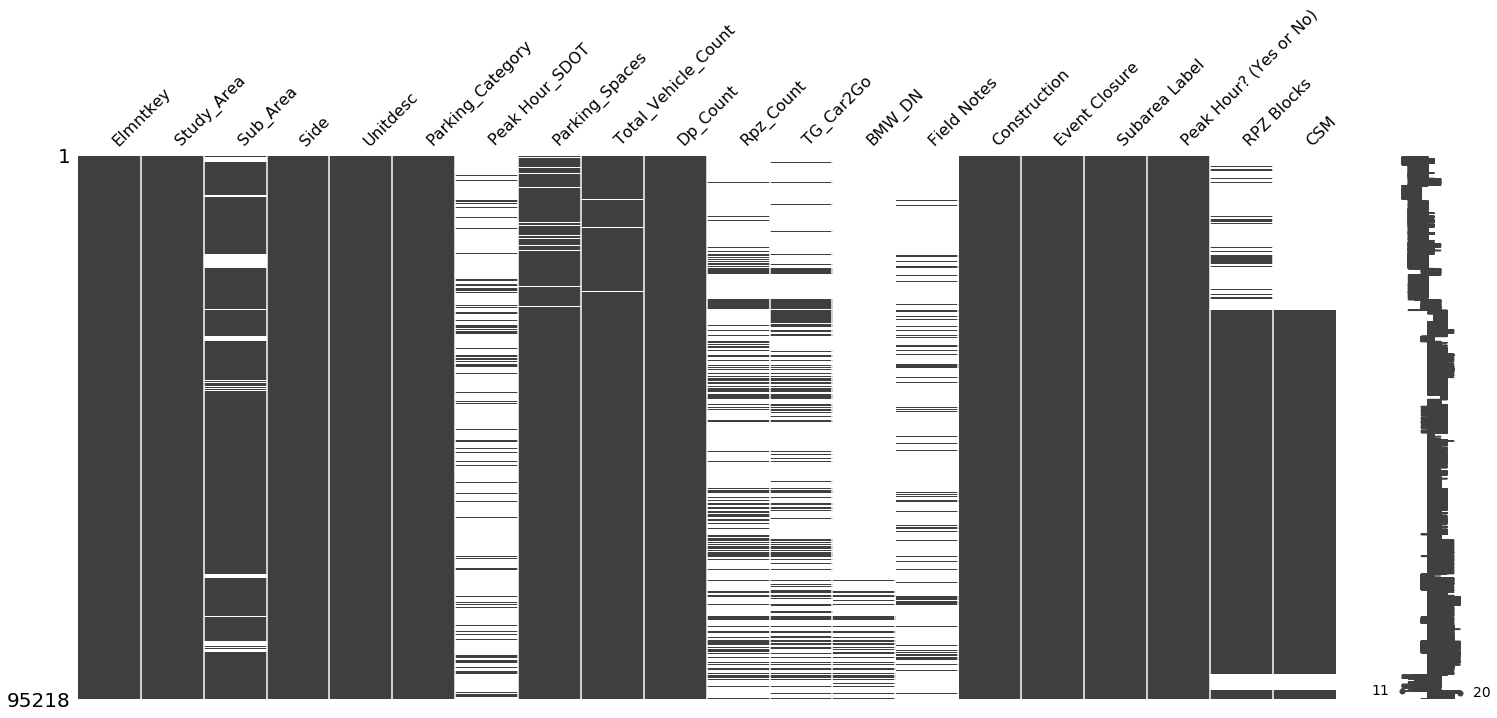

In [11]:
msno.matrix(df['fixed'])

In [12]:
NA = df['fixed'].shape[0] - df['fixed'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		95089
Percent of lines containing N/A:	99.86%


The data has been slighty rearanged when sorting by the new timestamp column.
The amount of missing value rows has not changed at this point.

## Exploration of the unknown columns
Before making a decision, it would be usefull to investegate what data associated with each of the columns.  
The data did not come with a description, which means we will have to look at the data and try to interpret meaning and usefullness for our case.

In [13]:
# clumns names to drop. Column names will be added after evaluation of each.
dropList = []

### Peak Hour_SDOT

In [14]:
NA = df['fixed']['Peak Hour_SDOT'].shape[0] - df['fixed']['Peak Hour_SDOT'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Peak Hour_SDOT'].value_counts().head(10)

Amount of lines containing N/A:		84420
Percent of lines containing N/A:	88.66%


6-9AM 3-7PM       2592
3-7PM             1939
7-9AM             1504
4-6PM             1391
6-9AM 3-6PM        758
6-9AM              754
                   544
7-9AM 4-6PM        511
3-6PM              456
6-9AM 3-6:30PM     173
Name: Peak Hour_SDOT, dtype: int64

This column seem to provide information, as to the busiest hours for the area. This is a very interesting column, but because nearly 90% of the data is missing, we choose to remove this column from the main dataset.   
A dataset with peakhours will also be made, after the cleaning, to explore the possibility to predict the mising values. It is noted, that a binary "is peak hour" column also exists, which could be used to generate the peak hours category.

In [15]:
dropList.append('Peak Hour_SDOT')

### TG_Car2Go

In [16]:
NA = df['fixed']['TG_Car2Go'].shape[0] - df['fixed']['TG_Car2Go'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['TG_Car2Go'].value_counts().head(10)

Amount of lines containing N/A:		68736
Percent of lines containing N/A:	72.19%


0.0    21374
1.0     4040
2.0      781
3.0      174
4.0       66
5.0       22
7.0        9
6.0        8
9.0        4
8.0        4
Name: TG_Car2Go, dtype: int64

Car 2 go is a car sharing service. This is not relevant for our use, and furthermore the columns does not seem to be interpreted.  
This column is marked as a drop column, with no second thoughts.

In [17]:
dropList.append('TG_Car2Go')

### BMW_DN

In [18]:
NA = df['fixed']['BMW_DN'].shape[0] - df['fixed']['BMW_DN'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))
df['fixed']['BMW_DN'].value_counts().head(10)

Amount of lines containing N/A:		89461
Percent of lines containing N/A:	93.95%


0.0    5240
1.0     479
2.0      18
3.0      10
4.0       9
5.0       1
Name: BMW_DN, dtype: int64

This column only has 5 different values. As we are unable to interpret what it means, this column is also marked for drop.

In [19]:
dropList.append('BMW_DN')

### Rpz_Count and RPZ Blocks
It is assumed that RPZ has the same meaning in this context. It makes sense to investegate the two RPZ columns together.

In [20]:
NA = df['fixed']['Rpz_Count'].shape[0] - df['fixed']['Rpz_Count'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Rpz_Count'].value_counts().head(10)

Amount of lines containing N/A:		70264
Percent of lines containing N/A:	73.79%


0.0    18386
4.0      988
3.0      960
1.0      857
5.0      834
2.0      790
6.0      651
7.0      525
8.0      401
9.0      204
Name: Rpz_Count, dtype: int64

In [21]:
NA = df['fixed']['RPZ Blocks'].shape[0] - df['fixed']['RPZ Blocks'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['RPZ Blocks'].value_counts().head(10)

Amount of lines containing N/A:		25315
Percent of lines containing N/A:	26.59%


0.0                        47132
0                           5629
Restricted Parking Zone     4578
21                          3940
4                           2298
13.0                        1913
7                           1462
24                           749
27                           728
2                            601
Name: RPZ Blocks, dtype: int64

RPZ only has one solid lead, this is the value "Restricted Parking Zone", found in the blocks column. This could indicate this is a form of "parking ticket" column. Our focus is only on legal means of parking, and therefore the RPZ columns is added to the drop list.

In [22]:
dropList.append('Rpz_Count')
dropList.append('RPZ Blocks')

### CSM

In [23]:
NA = df['fixed']['CSM'].shape[0] - df['fixed']['CSM'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['CSM'].value_counts().head(10)

Amount of lines containing N/A:		29867
Percent of lines containing N/A:	31.37%


Y                                                                                                          58896
N                                                                                                           6429
parking, paid, load (0,0,0 to 20,20,17)                                                                       12
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1)                                                              4
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (21,4 to 18,7)                                   2
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 3m (25,0 to 24,1), moved 4 from paid to other        2
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (24,3 to 18,9)                                   1
parking, paid, load (0,0,0 to 20,20,17); total,30m (23,6 to 20,10)                                             1
Parking, paid, load, zone (7,7,1,2 to 18,18,11,1); total, 30m (25,3 to 18,10)                   

This column has something to do with the parking zone. The biggest part of the data is marked Y and the second largest part is marked N. As there is no clue as to what is being asked, the column is also marked for drop.

In [24]:
dropList.append('CSM')

### Field notes
This field is suspected to hold notes taken by the observer. To confirm this, the first few notes will be investegated.

In [25]:
NA = df['fixed']['Field Notes'].shape[0] - df['fixed']['Field Notes'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['fixed'].shape[0]))
df['fixed']['Field Notes'].dropna().head(10)

Amount of lines containing N/A:		84369
Percent of lines containing N/A:	88.61%


Time stamp
2014-04-08 08:00:00                                     delivery vehicle
2014-04-08 08:00:00                                 schoolbus in loading
2014-04-08 08:00:00                       one school bus counted as paid
2014-04-08 09:00:00                               delivery truck in load
2014-04-08 10:00:00                   parking enforcement marked as paid
2014-04-08 12:00:00                             delivery in load - large
2014-04-08 13:00:00                                    parking attendant
2014-04-08 14:00:00                                   long utility truck
2014-04-08 15:00:00    south-pointing truck parked in center lane(not...
2014-04-08 16:00:00                                 1 motorcycle in paid
Name: Field Notes, dtype: object

As suspected, this is notes for the observation. This is not usefull information for us, and is marked for drop.

In [26]:
dropList.append('Field Notes')

## Cleaning
Now the columns has been marked for drop, a clean version of the dataset can be made.

In [27]:
df['clean'] = df['fixed'].drop(dropList,axis=1) 

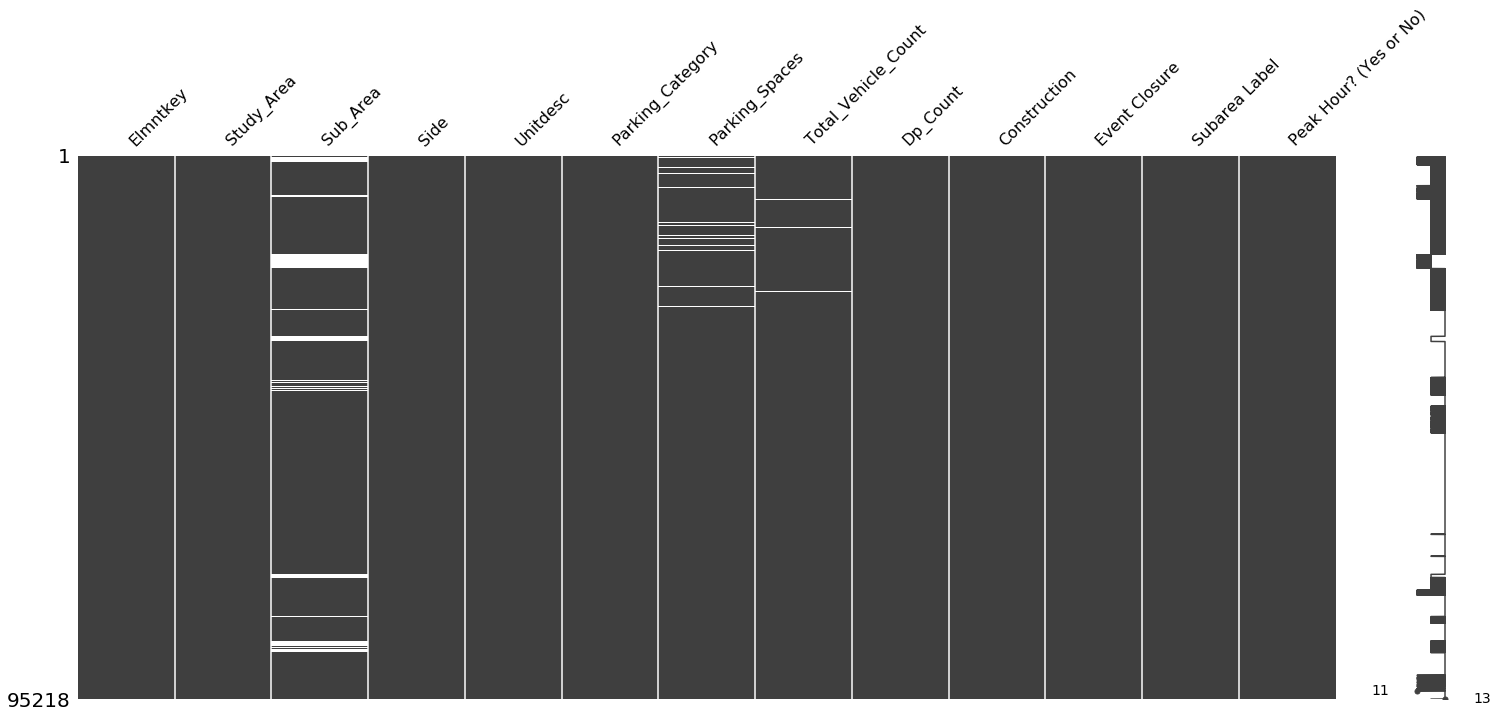

In [28]:
msno.matrix(df['clean'])

In [29]:
NA = df['clean'].shape[0] - df['clean'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

Amount of lines containing N/A:		9450
Percent of lines containing N/A:	9.92%


### Sub Area
For now, sub area is kept. This is only for consideration.

In [30]:
df['clean']['Parking_Category'].value_counts()

Paid Parking               71903
Restricted Parking Zone     7560
No Parking Allowed          6033
Time Limited Parking        5945
Unrestricted Parking        3638
Carpool Parking              139
Name: Parking_Category, dtype: int64

In [31]:
df['clean']['Sub_Area'].value_counts()

North         14070
Paid          11867
Unpaid        10695
Core          10663
Edge          10206
South          7578
Periphery      6461
Retail         4316
2              2314
Financial      2101
Waterfront     2046
10             1846
2 Hour         1313
10 Hour         741
NorthWest       520
0               364
4 Hour           52
                 32
Name: Sub_Area, dtype: int64

In [32]:
df['clean']['Subarea Label'].value_counts().head()

Belltown (North Subarea)          6048
Pike-Pine (Paid Subarea)          4148
First Hill (Paid Subarea)         3892
Denny Triangle (North Subarea)    3121
Pioneer Square (Edge Subarea)     2870
Name: Subarea Label, dtype: int64

The Subarea Label column, has a paranteses holding all the missing information about the subarea.
I will try to extract that information.

In [33]:
df['clean']['Subarea Label'].str.split('(').str[1].value_counts()

North Subarea)         14070
Paid Subarea)          11867
Unpaid Subarea)        10695
Core Subarea)          10663
Edge Subarea)          10206
South Subarea)          7578
Periphery Subarea)      6461
Retail Subarea)         4316
2 Hour Subarea)         3627
10 Hour Subarea)        2587
Financial Subarea)      2101
Waterfront Subarea)     2046
NorthWest Subarea)       520
0 Subarea)               364
4 Hour Subarea)           52
Spring)                   39
Summer)                   39
  Subarea)                32
Name: Subarea Label, dtype: int64

In [34]:
# dictionary
di = {'North Subarea)': "North",
      'Paid Subarea)': "Paid",
      'Core Subarea)' : 'Core', 
      'Unpaid Subarea)' : 'Unpaid', 
      'Edge Subarea)' : 'Edge', 
      'South Subarea)' : 'South',
      'Periphery Subarea)' : 'Periphery', 
      'Retail Subarea)' : 'Retail', 
      '2 Hour Subarea)' : '2-hour',
      '10 Hour Subarea)' : '10-hour',
      'Financial Subarea)' : 'Financecial',
      'Waterfront Subarea)' : 'Waterfront',
      'NorthWest Subarea)' : 'NorthWest',
      '0 Subarea)' : '0',
      '4 Hour Subarea)' : '4-hour',
      '  Subarea)' : 'unknown'}

In [35]:
# applying dictionary
df['clean']['Sub_Area'] = df['clean']['Subarea Label'].str.split('(').str[1].replace(di,)

# replacing left overs with unknown
df['clean']['Sub_Area'] = df['clean']['Sub_Area'].replace(np.nan,'unknown')

In [36]:
NA = df['clean'].shape[0] - df['clean'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['clean'].shape[0]))

Amount of lines containing N/A:		1579
Percent of lines containing N/A:	1.66%


In [37]:
df['clean'] = df['clean'].dropna()

In [38]:
df['clean'].shape

(93639, 13)

### Weekday / Weekend column

To create the column identiying whether a observation was made during a weekday or a weekend, we will use the timestamp.

In [39]:
# dictionary
di = {0: 'Weekday',
      1: 'Weekday',
      2: 'Weekday',
      3: 'Weekday',
      4: 'Weekday',
      5: 'Weekend',
      6: 'Weekend'}

df['clean'] = df['clean'].reset_index()
df['clean']['Day'] = df['clean']['Time stamp'].dt.weekday.replace(di)
df['clean'] = df['clean'].set_index('Time stamp')


## Location identifiers

In [40]:
df['clean'].head()

,Elmntkey,Study_Area,Sub_Area,Side,Unitdesc,Parking_Category,Parking_Spaces,Total_Vehicle_Count,Dp_Count,Construction,Event Closure,Subarea Label,Peak Hour? (Yes or No),Day
Time stamp,,,,,,,,,,,,,,
2014-04-08 08:00:00,24558,12th Ave - Weekday,unknown,E,12TH AVE BETWEEN E MARION ST AND E SPRING ST,Paid Parking,8.0,1.0,0,No,No,12th Ave - Weekday,No,Weekday
2014-04-08 08:00:00,24553,12th Ave - Weekday,unknown,W,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,Paid Parking,7.0,3.0,0,No,No,12th Ave - Weekday,No,Weekday
2014-04-08 08:00:00,69437,12th Ave - Weekday,unknown,W,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,Paid Parking,4.0,2.0,0,No,No,12th Ave - Weekday,No,Weekday
2014-04-08 08:00:00,46725,12th Ave - Weekday,unknown,W,12TH AVE BETWEEN E JEFFERSON ST AND E BARCLAY CT,Paid Parking,5.0,0.0,0,No,No,12th Ave - Weekday,No,Weekday
2014-04-08 08:00:00,69441,12th Ave - Weekday,unknown,W,12TH AVE BETWEEN E SPRING ST AND E MADISON ST,Paid Parking,3.0,0.0,0,No,No,12th Ave - Weekday,No,Weekday


The location columns are Study_Area, Sub_Area, Side, Unitdesc and Subarea Label.  
Let us investigate these attributes

In [41]:
print('\nSub_Area:')
print(df['clean']['Sub_Area'].value_counts().head())
print('\nSide:')
print(df['clean']['Side'].value_counts().head())
print('\nUnitdesc:')
print(df['clean']['Unitdesc'].value_counts().head())
print('\nStudy_Area:')
print(df['clean']['Study_Area'].value_counts().head())
print('\nSubarea Label:')
print(df['clean']['Subarea Label'].value_counts().head())
print(df['clean']['Subarea Label'].value_counts().tail())


Sub_Area:
North     13886
Paid      11756
Core      10542
Unpaid    10449
Edge      10206
Name: Sub_Area, dtype: int64

Side:
W     14860
E     13760
S     13372
N     13146
NE    10910
Name: Side, dtype: int64

Unitdesc:
NW 54TH SR ST BETWEEN 30TH WR AVE NW AND 32ND AVE NW    208
S WELLER ST BETWEEN MAYNARD AL S AND 7TH AVE S          166
S KING ST BETWEEN 7TH AVE S AND CANTON AL S             166
7TH AVE S BETWEEN S MAIN ST AND S JACKSON ST            166
8TH AVE S BETWEEN S KING ST AND S WELLER ST             166
Name: Unitdesc, dtype: int64

Study_Area:
Belltown            8526
South Lake Union    7722
First Hill          5796
Pike-Pine           5287
Pioneer Square      4592
Name: Study_Area, dtype: int64

Subarea Label:
Belltown (North Subarea)          6048
Pike-Pine (Paid Subarea)          4148
First Hill (Paid Subarea)         3892
Denny Triangle (North Subarea)    3121
Pioneer Square (Edge Subarea)     2870
Name: Subarea Label, dtype: int64
Ballard Locks Spring              

It seems like the location is described most precisely by unitdesc combined with side, followed by Study_Area and Sub_Area. For our purpose, there is no reason to distinguish between the side of the street, and we should combine the rows.
Also subarea label, hold a combination of both study_area, Sub_area and the Day column. This is not necesarry, as all this information already resides in the other columns. The column will be removed.

In [42]:
df['clean'] = df['clean'].drop('Subarea Label',axis=1) 

For location, it would make more sense to have 3 columns, in the style below:

|name      |Description|
|-------------------|-----------|
|Area          |Identifier for the area (E.g. North,south, core)|
|Sub_area         |The sub area the observation was made on (E.g: 12th Ave)|
|Location           |A more exact location (E.g. 12TH AVE BETWEEN E MARION ST AND E SPRING ST) |


In [43]:
# renaming attribute Sub_area to Area
df['clean'] = df['clean'].rename(columns = {'Sub_Area':'Area'})

# Removing the event from study area, and creating a column with only the desired information
df['clean']['Sub_Area'] = df['clean']['Study_Area'].str.split('-').str[0]
df['clean'] = df['clean'].drop('Study_Area',axis=1) 

# rename Unitdesc to Location
df['clean'] = df['clean'].rename(columns = {'Unitdesc':'Location'})

In [44]:
df['clean'].columns.tolist()

['Elmntkey',
 'Area',
 'Side',
 'Location',
 'Parking_Category',
 'Parking_Spaces',
 'Total_Vehicle_Count',
 'Dp_Count',
 'Construction',
 'Event Closure',
 'Peak Hour? (Yes or No)',
 'Day',
 'Sub_Area']

In [45]:
df['clean'] = df['clean'].reindex_axis(['Elmntkey','Area','Sub_Area','Location','Side','Day',
                                        'Parking_Category','Peak Hour? (Yes or No)','Parking_Spaces','Total_Vehicle_Count','Dp_Count',
                                        'Construction','Event Closure'], axis=1)

It will now be investigated, if the unknown labels can be found, by investegating the Sub_Area

In [46]:
df['clean']['Sub_Area'].unique().tolist()

['12th Ave ',
 'Westlake ',
 'Uptown Triangle ',
 'University District ',
 'Ballard Locks ',
 'Green Lake ',
 'Chinatown/ID ',
 'Fremont ',
 'Cherry Hill ',
 'Capitol Hill ',
 'Belltown ',
 'Little Saigon ',
 'Pioneer Square ',
 'Denny Triangle ',
 'Commercial Core ',
 'Pike',
 'South Lake Union ',
 'First Hill ',
 'Ballard ',
 'Roosevelt ',
 'Uptown ',
 'University District',
 'Denny Triangle',
 'Uptown Triangle',
 '12th Avenue',
 'Capitol Hill',
 'Commercial Core',
 'Chinatown/ID',
 'Columbia City',
 'Cherry Hill',
 'Fremont',
 'South Lake Union',
 'Green Lake',
 'Roosevelt',
 'Belltown',
 'Uptown',
 'First Hill',
 'Ballard Locks',
 'Westlake',
 'Ballard',
 'Ballard Locks Summer',
 'Pioneer Square',
 'Dexter',
 '15th Avenue',
 'Ballard Locks Spring ',
 'Ballard Locks summer']

First of all, some attributes are spelled slightly different. This will have to be fixed, for easier indexing.

In [47]:
# dictionary
di = {'12th Ave ' : '12th Ave',
      'Westlake ' : 'Westlake',
      'Uptown Triangle ' : 'Uptown Triangle',
      'University District ' : 'University District',
      'Ballard Locks' : 'Ballard',
      'Green Lake ' : 'Green Lake',
      'Chinatown/ID ' : 'Chinatown',
      'Fremont ' : 'Fremont',
      'Cherry Hill ' : 'Cherry Hill',
      'Capitol Hill ' : 'Capitol Hill',
      'Belltown ' : 'Belltown',
      'Little Saigon ' : 'Little Saigon',
      'Pioneer Square ' : 'Pioneer Square',
      'Denny Triangle ' : 'Denny Triangle',
      'Commercial Core ' : 'Commercial Core',
      'South Lake Union ' : 'South Lake Union',
      'First Hill ' : 'First Hill',
      'Ballard ' : 'Ballard',
      'Roosevelt ' : 'Roosevelt',
      'Uptown ' : 'Uptown',
      '12th Avenue' : '12th Ave',
      'Chinatown/ID' : 'Chinatown',
      'Ballard Locks Summer' : 'Ballard',
      'Ballard Locks Spring ' : 'Ballard',
      'Ballard Locks summer' : 'Ballard',
      '15th Avenue' : '15th Ave',
      'Ballard Locks ' : 'Ballard'
      }

# Rename
df['clean']['Sub_Area'] = df['clean']['Sub_Area'].replace(di)

Now, we will check each the sub labels, attachet to the unknown areas

In [48]:
df['clean'][df['clean']['Area'].isin({'unknown'})]['Sub_Area'].unique().tolist()

['12th Ave',
 'Uptown Triangle',
 'Fremont',
 'Capitol Hill',
 'Little Saigon',
 'First Hill',
 'Columbia City',
 'South Lake Union',
 'Ballard',
 'Green Lake',
 'Cherry Hill']

Now, i will investigate if any of these streets, has been registered with an area at some point.

In [49]:
mylist = df['clean'][df['clean']['Area'].isin({'unknown'})]['Sub_Area'].unique().tolist()

for item in mylist:
    print('\n',item)
    print(df['clean'][df['clean']['Sub_Area'].isin({item})]['Area'].value_counts())


 12th Ave
unknown    793
Name: Area, dtype: int64

 Uptown Triangle
unknown    1246
Name: Area, dtype: int64

 Fremont
Unpaid     1290
Paid        638
unknown      16
Name: Area, dtype: int64

 Capitol Hill
South      1397
Unpaid     1358
North      1241
unknown      16
Name: Area, dtype: int64

 Little Saigon
unknown    533
Name: Area, dtype: int64

 First Hill
Paid       3892
unknown    3801
Unpaid      308
Name: Area, dtype: int64

 Columbia City
unknown    700
Name: Area, dtype: int64

 South Lake Union
2-hour       3276
10-hour      2418
South        2054
North         559
NorthWest     507
0             364
Unpaid        169
unknown        78
Name: Area, dtype: int64

 Ballard
Edge         1722
Unpaid       1676
Core         1016
Periphery     352
unknown       234
Summer)        39
Spring)        39
Name: Area, dtype: int64

 Green Lake
Unpaid     872
Paid       766
unknown    330
Name: Area, dtype: int64

 Cherry Hill
Unpaid     965
Paid       252
unknown     78
Name: Area, dt

It seems like the column Area is not what we expected. It is unclear what the use of this is. We chose to delete it.

In [50]:
df['clean'] = df['clean'].drop('Area',axis=1)

We can now rename the other axis, to Area and Sub_Area instead of Sub_Area and Location

In [51]:
# rename Unitdesc to Location
df['clean'] = df['clean'].rename(columns = {'Sub_Area':'Area','Location':'Sub_Area'})

## Renaming attributes

In [52]:
df['clean'].head()

,Elmntkey,Area,Sub_Area,Side,Day,Parking_Category,Peak Hour? (Yes or No),Parking_Spaces,Total_Vehicle_Count,Dp_Count,Construction,Event Closure
Time stamp,,,,,,,,,,,,
2014-04-08 08:00:00,24558,12th Ave,12TH AVE BETWEEN E MARION ST AND E SPRING ST,E,Weekday,Paid Parking,No,8.0,1.0,0,No,No
2014-04-08 08:00:00,24553,12th Ave,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,W,Weekday,Paid Parking,No,7.0,3.0,0,No,No
2014-04-08 08:00:00,69437,12th Ave,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,W,Weekday,Paid Parking,No,4.0,2.0,0,No,No
2014-04-08 08:00:00,46725,12th Ave,12TH AVE BETWEEN E JEFFERSON ST AND E BARCLAY CT,W,Weekday,Paid Parking,No,5.0,0.0,0,No,No
2014-04-08 08:00:00,69441,12th Ave,12TH AVE BETWEEN E SPRING ST AND E MADISON ST,W,Weekday,Paid Parking,No,3.0,0.0,0,No,No


An updated table with information about each column is shown here. Investigation is shown below.



|Original name      |New name|Description|
|-------------------|-----------|-|
|Elmntkey           |ID|Identifier for the observation location|
|Study_Area         |Area|The area where the observation was made|
|Sub_Area           |Sub_Area|The area, on a larger scale, where the observation was made|
|Side               |Side|Which side of the street/parking lot was observed|
|Unitdesc           |Location|The location of the observation in human language|
|Parking_Category   |Parking_Category|The type of parking, e.g. Paid|
|Parking_Spaces     |Free_Spaces|The amount of availible parking spots|
|Total_Vehicle_Count|Used_Spaces|The amount of vehicle parked|
|Dp_Count           |Dp_Count| *DROPED* Disabled parking|
|Construction       |Construction|A true false column, identifying if the lot is closed due to construction|
|Event Closure      |Event Closures|A true false column, identifying if a lot is closed due to an event|
|Subarea Label      |Subarea Label|The area where the observation was made|
|Peak Hour? (Yes or No)|Peak Hour|Indicates if the observation was made during a peak hour|
|Day                |Day|A clomun indicating if the observation is made on a weekday, an event day or a sunday|

### Elmntkey

In [53]:
print('Elmntkey')
df['clean']['Elmntkey'].value_counts().head(10)

Elmntkey


94736    104
94731    104
94732    104
42966     83
57017     83
8301      83
75282     83
43941     83
66622     83
42962     83
Name: Elmntkey, dtype: int64

In [54]:
df['clean'][df['clean'].Elmntkey.isin({94736})].head()

,Elmntkey,Area,Sub_Area,Side,Day,Parking_Category,Peak Hour? (Yes or No),Parking_Spaces,Total_Vehicle_Count,Dp_Count,Construction,Event Closure
Time stamp,,,,,,,,,,,,
2014-04-10 08:00:00,94736,Ballard,NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST,N,Weekday,Paid Parking,No,12.0,0.0,0,No,No
2014-04-10 09:00:00,94736,Ballard,NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST,N,Weekday,Paid Parking,No,12.0,0.0,0,No,No
2014-04-10 10:00:00,94736,Ballard,NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST,N,Weekday,Paid Parking,No,12.0,0.0,0,No,No
2014-04-10 11:00:00,94736,Ballard,NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST,N,Weekday,Paid Parking,No,12.0,0.0,0,No,No
2014-04-10 12:00:00,94736,Ballard,NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST,N,Weekday,Paid Parking,No,12.0,0.0,0,No,No


In [55]:
df['clean'][df['clean'].Elmntkey.isin({94736})].Area.value_counts().head()

Ballard    104
Name: Area, dtype: int64

This column holds the ID of the parking lot. All entries with this ID is the same area.
The column will be renamed to ID

In [56]:
 df['clean'] = df['clean'].rename(columns = {'Elmntkey':'ID'})

### Parking_Spaces

In [57]:
df['clean']['Parking_Spaces'].value_counts().head()

0.0    12705
6.0     9278
7.0     9038
5.0     9020
8.0     8776
Name: Parking_Spaces, dtype: int64

As there are values with zero, this attribute has to be availible parking spaces.  
Alternatively it could have been the total amount of spots, but as there are zero values it would not make any sense.  
The column will be renamed to Free_Spaces.

In [58]:
df['clean'] = df['clean'].rename(columns = {'Parking_Spaces':'Free_Spaces'})

### Total vehicle count

This column will be renamed to Used_Spaces

In [59]:
df['clean'] = df['clean'].rename(columns = {'Total_Vehicle_Count':'Used_Spaces'})

### Total Parking spaces

It would make sense to have a total parking spaces column, in addition to free spaces and vehicle count

### Dp_Count

In [60]:
df['clean']['Dp_Count'].value_counts().head()

0    67734
1    14019
2     6004
3     2758
4     1417
Name: Dp_Count, dtype: int64

This consists of very small numbers. It is my guess that Dp is dissabled parking spots. This column is not relevent, as our target group is not handicapped people.  
This column will be dropped

In [61]:
df['clean'] = df['clean'].drop('Dp_Count',axis=1)

### Construction

In [62]:
df['clean']['Construction'].value_counts().head()

No     87674
Yes     5948
no        13
yes        4
Name: Construction, dtype: int64

In [63]:
df['clean'][df['clean'].Construction.isin({'Yes'})].head()

,ID,Area,Sub_Area,Side,Day,Parking_Category,Peak Hour? (Yes or No),Free_Spaces,Used_Spaces,Construction,Event Closure
Time stamp,,,,,,,,,,,
2014-04-09 08:00:00,8010,Uptown Triangle,6TH AVE N BETWEEN THOMAS ST AND HARRISON ST,E,Weekday,No Parking Allowed,No,0.0,0.0,Yes,No
2014-04-09 08:00:00,77394,University District,BROOKLYN AVE NE BETWEEN NE 43RD ST AND NE 45TH ST,E,Weekday,No Parking Allowed,No,0.0,0.0,Yes,No
2014-04-09 08:00:00,53142,Uptown Triangle,6TH AVE N BETWEEN HARRISON ST AND REPUBLICAN ST,E,Weekday,No Parking Allowed,No,0.0,0.0,Yes,No
2014-04-09 08:00:00,56142,Uptown Triangle,HARRISON ST BETWEEN 6TH AVE N AND AURORA AVE N,S,Weekday,No Parking Allowed,No,0.0,0.0,Yes,No
2014-04-09 08:00:00,77393,University District,BROOKLYN AVE NE BETWEEN NE 43RD ST AND NE 45TH ST,W,Weekday,No Parking Allowed,No,0.0,0.0,Yes,No


In [64]:
obj = df['clean'][df['clean'].Construction.isin({'Yes'})]
obj['Used_Spaces'].value_counts()

0.0    5948
Name: Used_Spaces, dtype: int64

It seems like when construction is true, it infers that the parking lot is closed.  
It would make sense to remove the closed parking lots from the dataset.

In [65]:
# dictionary
di = {'no': 'No',
      'yes': 'Yes',}

# applying dictionary
df['clean']['Construction'] = df['clean']['Construction'].replace(di,)

In [66]:
df['clean'] = df['clean'][df['clean'].Construction != 'Yes']
df['clean']['Construction'].value_counts().head()

No    87687
Name: Construction, dtype: int64

In [67]:
df['clean'] = df['clean'].drop('Construction',axis=1) 

### Event Closure

In [68]:
df['clean']['Event Closure'].value_counts().head()

No     86686
Yes     1001
Name: Event Closure, dtype: int64

In [69]:
df['clean'][df['clean']['Event Closure'].isin({'Yes'})].head()

,ID,Area,Sub_Area,Side,Day,Parking_Category,Peak Hour? (Yes or No),Free_Spaces,Used_Spaces,Event Closure
Time stamp,,,,,,,,,,
2014-04-26 08:00:00,8858,Commercial Core,ALASKAN E RDWY WAY BETWEEN SPRING ST AND SENEC...,NE,Weekend,No Parking Allowed,No,0.0,0.0,Yes
2014-04-26 09:00:00,8858,Commercial Core,ALASKAN E RDWY WAY BETWEEN SPRING ST AND SENEC...,NE,Weekend,No Parking Allowed,No,0.0,0.0,Yes
2014-04-26 10:00:00,8858,Commercial Core,ALASKAN E RDWY WAY BETWEEN SPRING ST AND SENEC...,NE,Weekend,No Parking Allowed,No,0.0,0.0,Yes
2014-04-26 11:00:00,8858,Commercial Core,ALASKAN E RDWY WAY BETWEEN SPRING ST AND SENEC...,NE,Weekend,No Parking Allowed,No,0.0,0.0,Yes
2014-04-26 12:00:00,8858,Commercial Core,ALASKAN E RDWY WAY BETWEEN SPRING ST AND SENEC...,NE,Weekend,No Parking Allowed,No,0.0,0.0,Yes


In [70]:
obj = df['clean'][df['clean']['Event Closure'].isin({'Yes'})]
obj['Free_Spaces'].value_counts()

0.0    1001
Name: Free_Spaces, dtype: int64

This column has the same properties as construction, but is triggered by the parking place being closed by an event.  
The columns which eqauls true should be dropped.

In [71]:
df['clean'] = df['clean'][df['clean']['Event Closure'] != 'Yes']

In [72]:
df['clean'] = df['clean'].drop('Event Closure',axis=1) 

### Peak Hour? (Yes or No)
This column will be renamed for simplicity. The name tells the story of this attribute.

In [73]:
df['clean'] = df['clean'].rename(columns = {'Peak Hour? (Yes or No)':'Peak Hour'})

In [74]:
df['clean'].shape

(86686, 9)

### Final cleanup

The last thing we should do, is to remove the types of parking spots we have no interest in.
The only one of no interest would be the no parking allowed category

In [75]:
list = df['clean']['Parking_Category'].unique().tolist()

for item in list:
    print(item)
    obj = df['clean'][df['clean']['Parking_Category'].isin({item})]
    print(obj['Used_Spaces'].value_counts().head())

Paid Parking
4.0    7733
3.0    7200
5.0    7196
0.0    6927
6.0    6407
Name: Used_Spaces, dtype: int64
Restricted Parking Zone
8.0     860
7.0     811
9.0     791
6.0     655
10.0    622
Name: Used_Spaces, dtype: int64
Time Limited Parking
4.0    595
0.0    508
5.0    469
3.0    434
6.0    374
Name: Used_Spaces, dtype: int64
Unrestricted Parking
7.0    340
9.0    291
8.0    279
6.0    274
5.0    270
Name: Used_Spaces, dtype: int64
No Parking Allowed
0.0     4424
2.0        5
17.0       4
1.0        3
18.0       2
Name: Used_Spaces, dtype: int64
Carpool Parking
8.0    22
7.0    22
6.0    12
4.0    12
9.0    10
Name: Used_Spaces, dtype: int64


In [76]:
df['clean'] = df['clean'][df['clean']['Parking_Category'] != 'No Parking Allowed']

## Splitting the dataset
The dataset will be split into two version. One with the count based on sub area, and a smaller one with a count based on the entire area.

In [77]:
df['sub'] = df['clean'].reset_index()
df['sub'] = df['sub'].groupby(['Time stamp','Area','Day','Parking_Category','Peak Hour','Sub_Area'], as_index=False)['Free_Spaces','Used_Spaces'].sum()
df['sub'] = df['sub'].set_index('Time stamp')
    
df['area'] = df['clean'].reset_index()
df['area'] = df['area'].groupby(['Time stamp','Area','Day','Parking_Category','Peak Hour'], as_index=False)['Free_Spaces','Used_Spaces'].sum()
df['area'] = df['area'].set_index('Time stamp')

In [78]:
print(df['sub'].shape)
print(df['area'].shape)

(41250, 7)
(2323, 6)


### Setting a % full column on the datasets

In [79]:
df['area']['% Full'] = round(df['area']['Free_Spaces']/(df['area']['Free_Spaces']+df['area']['Used_Spaces'])*100)
df['sub']['% Full'] = round(df['sub']['Free_Spaces']/(df['sub']['Free_Spaces']+df['sub']['Used_Spaces'])*100)

In [80]:
df['area'] = df['area'].dropna()
df['sub'] = df['sub'].dropna()

In [81]:
78+44

122

# Result

In [82]:
df['sub'].head()

,Area,Day,Parking_Category,Peak Hour,Sub_Area,Free_Spaces,Used_Spaces,% full
Time stamp,,,,,,,,
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,12TH AVE BETWEEN E BARCLAY CT AND E JAMES CT,12.0,0.0,100.0
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,13.0,7.0,65.0
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,12TH AVE BETWEEN E COLUMBIA ST AND E MARION ST,15.0,4.0,79.0
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,4.0,2.0,67.0
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,12TH AVE BETWEEN E JEFFERSON ST AND E BARCLAY CT,8.0,0.0,100.0


In [83]:
df['area'].head()

,Area,Day,Parking_Category,Peak Hour,Free_Spaces,Used_Spaces,% full
Time stamp,,,,,,,
2014-04-08 08:00:00,12th Ave,Weekday,Paid Parking,No,78.0,22.0,78.0
2014-04-08 09:00:00,12th Ave,Weekday,Paid Parking,No,78.0,44.0,64.0
2014-04-08 10:00:00,12th Ave,Weekday,Paid Parking,No,78.0,48.0,62.0
2014-04-08 11:00:00,12th Ave,Weekday,Paid Parking,No,78.0,46.0,63.0
2014-04-08 12:00:00,12th Ave,Weekday,Paid Parking,No,78.0,51.0,60.0


The dataset is saved into a file called sub-area.csv and area.csv

In [84]:
df['sub'].to_csv('./Data/sub-area.csv')
df['area'].to_csv('./Data/area.csv')